In [3]:
import dask
import dask.dataframe as dd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def winsorize_variable(data, variable, new_column_name, lower_percentile=0.01, upper_percentile=0.99):
    """
    Realiza la winsorización de una variable en un conjunto de datos y la almacena en una nueva columna.

    Args:
        data (pd.DataFrame): El DataFrame que contiene los datos.
        variable (str): El nombre de la variable que se va a winsorizar.
        new_column_name (str): El nombre para la nueva columna que almacenará los datos winsorizados (si no se proporciona, se usará el nombre de la variable original con "_winsorized").
        lower_percentile (float): Percentil inferior para la winsorización (valor predeterminado es 0.01).
        upper_percentile (float): Percentil superior para la winsorización (valor predeterminado es 0.99).
    """
    if new_column_name is None:
        new_column_name = variable + "_winsorized"

    lower_limit = data[variable].quantile(lower_percentile)
    upper_limit = data[variable].quantile(upper_percentile)

    data[new_column_name] = data[variable].clip(lower_limit, upper_limit)

def plot_boxplot(data, column_name):
    """
    Genera un boxplot de una columna de datos.

    Args:
        data (dask.dataframe.DataFrame): El DataFrame Dask que contiene los datos.
        column_name (str): El nombre de la columna que se va a graficar.

    Returns:
        None
    """
    # Crea el boxplot
    plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico
    sns.boxplot(x=data[column_name].compute())

    # Personaliza el gráfico
    plt.title(f'Boxplot de {column_name}')
    plt.xlabel(column_name)

    plt.show()

def perform_tasks_with_dask(file_pattern, num_workers=16, threads_per_worker=12, use_gpu=True):
    """
    Perform tasks using Dask, such as reading CSV files, configuring Dask, and printing the first 5 rows.

    :param file_pattern: A file pattern to match CSV files.
    :param num_workers: The number of Dask workers to use.
    :param threads_per_worker: The number of threads per Dask worker.
    :param use_gpu: Whether to use GPU for Dask computations.
    :return: A Dask DataFrame containing the data.
    """
    dask.config.set(
        scheduler='threads',
        num_workers=num_workers,
        threads_per_worker=threads_per_worker,
        use_gpu=use_gpu
    )

    df = dd.read_csv(file_pattern, assume_missing=True, header=0)
    df = df.reset_index()
    return df

def paired_ttest_for_duplicated_columns(df, alpha=0.05):
    """
    Perform a paired t-test on duplicated columns of a Dask DataFrame.

    :param df: The DataFrame containing the data.
    :param alpha: Significance level for the test (default is 0.05).
    :return: A list of results that include the columns, t-statistic, p-value, and significance.
    """
    duplicated_columns = [
        'col1_boolean', 'col2_boolean', 'col3_boolean', 'col4_boolean',
        'col5_float', 'col6_float', 'col7_float', 'col8_float',
        'col9_float', 'col10_float', 'col11_float', 'col12_float',
        'col13_float', 'col14_float', 'col15_float', 'col16_float',
        'col17_float', 'col18_float', 'col19_float', 'col20_float',
        'col21_float', 'col22_float', 'col23_float', 'col24_float',
        'col25_float', 'col26_float', 'col27_float', 'col28_float',
        'stableCruise_boolean', 'stableCruise_boolean',
        'col31_integer', 'col32_integer', 'col33_integer',
        'col34_integer', 'col35_integer', 'col36_integer'
    ]

    results = []

    for i in range(0, len(duplicated_columns), 2):
        column1 = duplicated_columns[i]
        column2 = duplicated_columns[i + 1]

        t_stat, p_value = stats.ttest_rel(df[column1].compute(), df[column2].compute())

        if p_value < alpha:
            significance = "Diferencia estadísticamente significativa"
        else:
            significance = "No hay diferencia estadísticamente significativa"

        results.append({
            "Columna 1": column1,
            "Columna 2": column2,
            "t-statistic": t_stat,
            "p-value": p_value,
            "Significancia": significance
        })

    return results

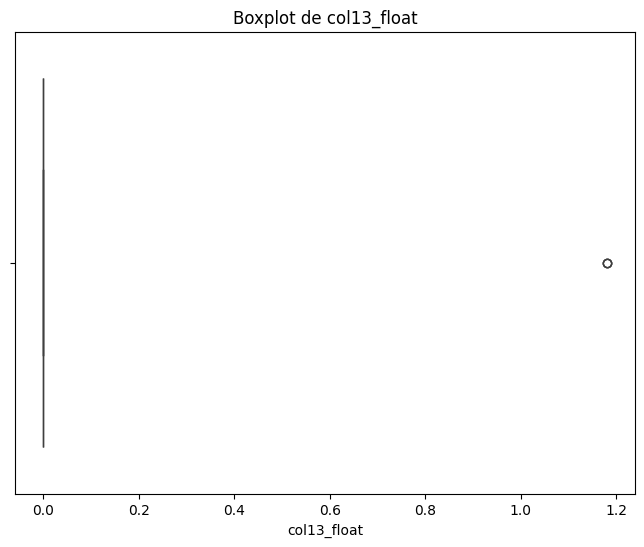

In [6]:
if __name__ == "__main__":
    file_pattern = "../Data/EC_Data/*.csv"
    df = dd.read_csv(file_pattern)

    #plot_boxplot(df, 'col13_float')
    # winsorize_variable(df, "col13_float", "wzcol13_float")
    